In [ ]:
# !git clone https://github.com/pythonlessons/OIDv4_ToolKit.git
# !pip install -r OIDv4_ToolKit/requirements.txt

In [ ]:
# restart runtime before this
# !python OIDv4_ToolKit/main.py downloader --classes 'Human face' --type_csv train --limit 500
# !python OIDv4_ToolKit/main.py downloader --classes 'Human face' --type_csv test --limit 100
# Convert annotations from txt to xml
# !python OIDv4_ToolKit/oid_to_pascal_voc_xml.py

In [ ]:
# !git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git
# !mv OID TensorFlow-2.x-YOLOv3
# %cd TensorFlow-2.x-YOLOv3

In [2]:
# Check if NVIDIA GPU is enabled
# !nvidia-smi

Mon Jun 29 04:25:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
#Not needed unless running from drive
%cd drive/My\ Drive/Colab\ Notebooks/TensorFlow-2.x-YOLOv3/
# !ls

/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3


In [4]:
# !pip install -r ./requirements.txt

ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.2 (from -r ./requirements.txt (line 6)) (from versions: 3.1.0.4, 3.1.0.5, 3.2.0.6, 3.2.0.7, 3.2.0.8, 3.3.0.9, 3.3.0.10, 3.3.1.11, 3.4.0.12, 3.4.0.14, 3.4.1.15, 3.4.2.16, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34)
ERROR: No matching distribution found for opencv-python==4.1.2 (from -r ./requirements.txt (line 6))


In [ ]:
# Download weights for YOLO trained on COCO dataset
# !wget -P model_data https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-06-27 08:38:28--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘model_data/yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  2.73MB/s    in 13s     

2020-06-27 08:38:41 (2.63 MB/s) - ‘model_data/yolov3-tiny.weights’ saved [35434956/35434956]



In [5]:
# import tensorflow as tf
# print(tf.__version__)
# tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE

In [ ]:
#Customise the path for dataset in this file before running this (set Data_dir = OID/Dataset )
# !python tools/XML_to_YOLOv3.py

/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/e715e98c0507f78c.jpg 212,276,380,515,0 385,136,565,308,0 759,168,964,418,0
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/12ce17349f1afaa0.jpg 123,128,183,204,0 300,178,360,256,0 349,427,412,500,0 432,117,487,197,0 527,450,596,521,0 578,73,638,169,0 737,173,784,245,0 808,435,874,520,0 821,168,896,248,0
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/2f1c4c1e75607e20.jpg 411,618,483,704,0
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/150f17df594f1020.jpg 352,26,714,508,0
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/b1098d899266ca09.jpg 455,120,580,277,0
/content/drive/My Drive/Colab Notebooks/TensorFlow-2.x-YOLOv3/OID/Dataset/train/Human_face/3

In [3]:
#start training
# Line 96 in train.py => for tweaking learning rate decay (near 0.2 is the sweet spot)
#Restart runtime after any change in config.py
from train import *
tf.keras.backend.clear_session()
main()

Streaming output truncated to the last 5000 lines.
epoch:26 step:   35/63, lr:0.000031011, giou_loss:   2.91, conf_loss:   4.05, prob_loss:   0.06, total_loss:   7.03
epoch:26 step:   36/63, lr:0.000031005, giou_loss:   4.85, conf_loss:   6.77, prob_loss:   0.14, total_loss:  11.76
epoch:26 step:   37/63, lr:0.000030998, giou_loss:   3.14, conf_loss:   3.96, prob_loss:   0.04, total_loss:   7.14
epoch:26 step:   38/63, lr:0.000030992, giou_loss:   3.91, conf_loss:   4.90, prob_loss:   0.09, total_loss:   8.89
epoch:26 step:   39/63, lr:0.000030985, giou_loss:   3.24, conf_loss:   4.44, prob_loss:   0.04, total_loss:   7.72
epoch:26 step:   40/63, lr:0.000030979, giou_loss:   1.82, conf_loss:   3.01, prob_loss:   0.01, total_loss:   4.85
epoch:26 step:   41/63, lr:0.000030973, giou_loss:   3.13, conf_loss:   4.18, prob_loss:   0.06, total_loss:   7.37
epoch:26 step:   42/63, lr:0.000030966, giou_loss:   4.22, conf_loss:   4.93, prob_loss:   0.07, total_loss:   9.21
epoch:26 step:   43/6

In [4]:
# !rm checkpoints/* 
!ls checkpoints

checkpoint
checkpoint.tmp3cb59b0911b44aca91fce9c9c42780bb
yolov3_face_Tiny.data-00000-of-00002
yolov3_face_Tiny.data-00001-of-00002
yolov3_face_Tiny.h5
yolov3_face_Tiny.index


In [5]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_face_Tiny") # use keras weights

In [20]:
#Save as keras model for resuming from checkpoint
yolo.save_weights('./checkpoints/yolov3_face_Tiny.h5')

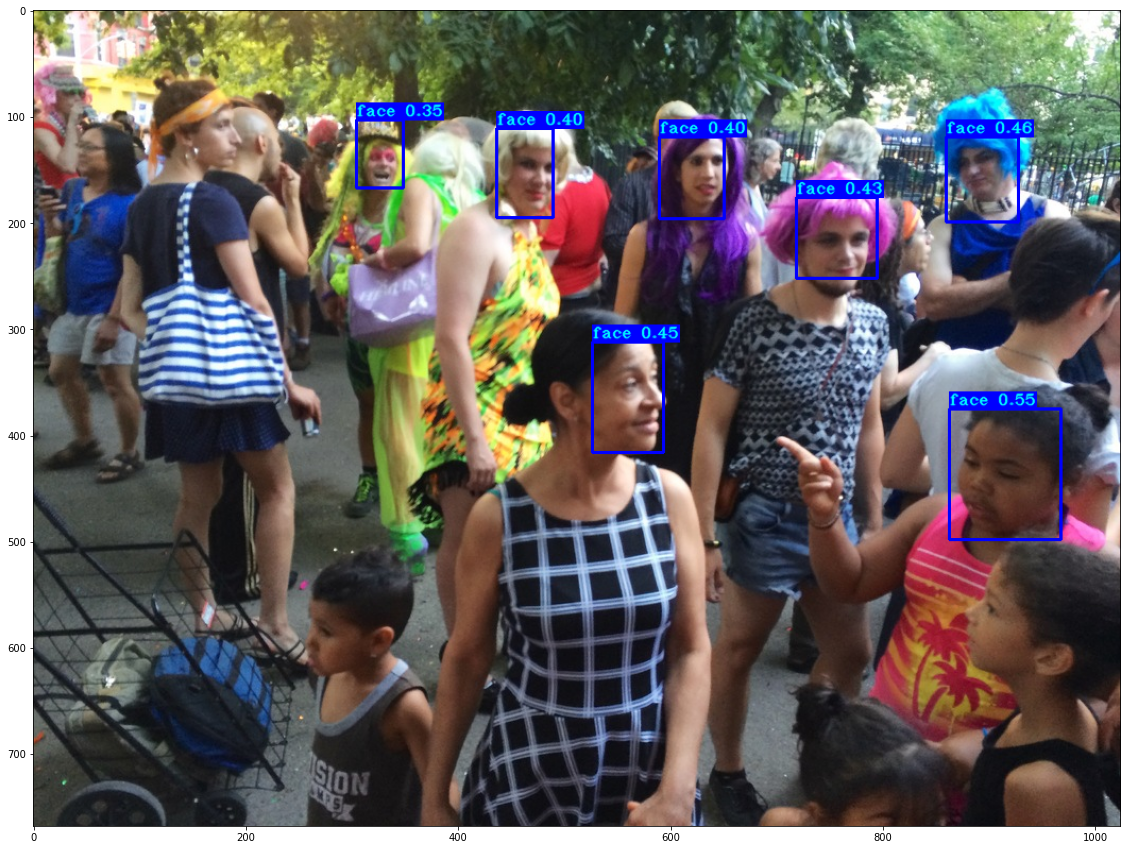

In [10]:
image_path   = "./IMAGES/1.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES,
                     score_threshold=0.34, iou_threshold=0.25, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

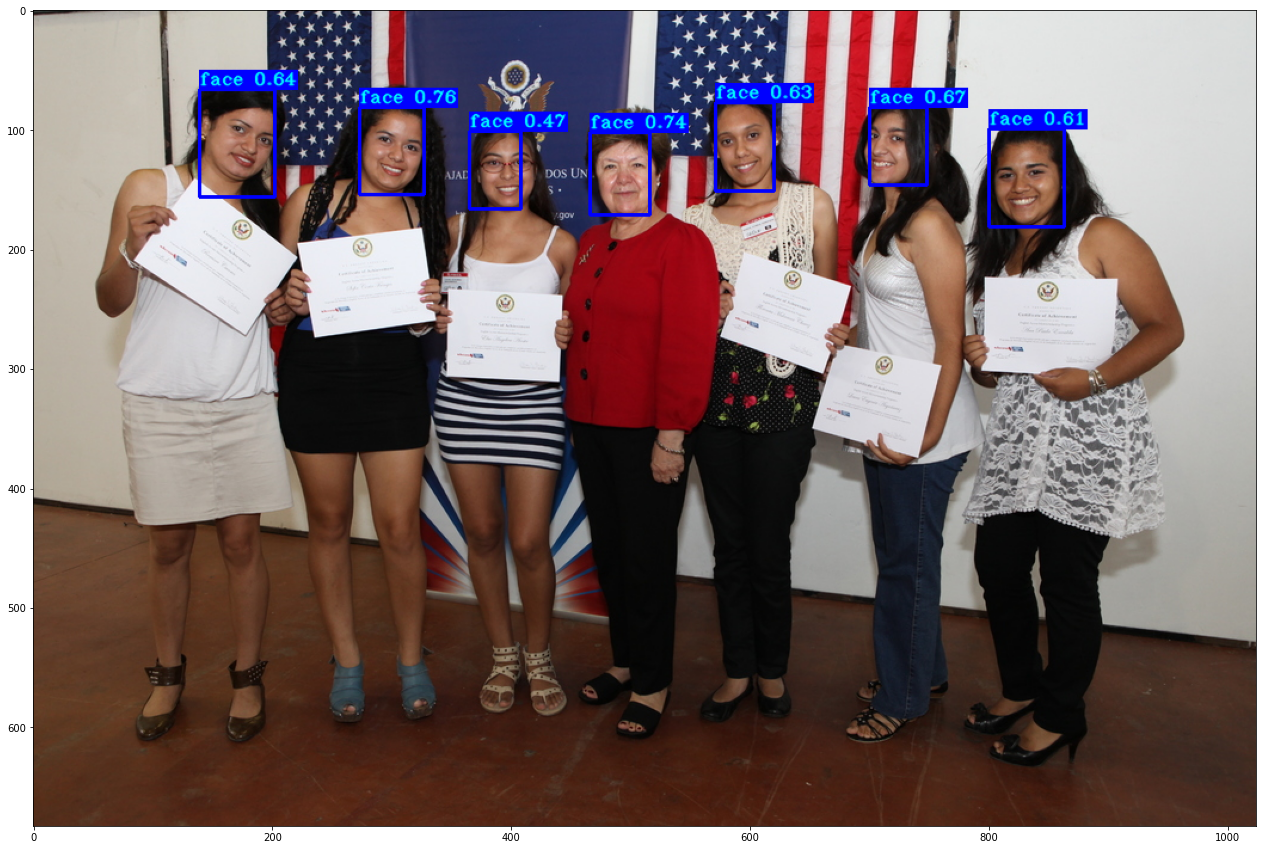

In [11]:
image_path   = "./IMAGES/2.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES,
                     score_threshold=0.35, iou_threshold=0.35, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

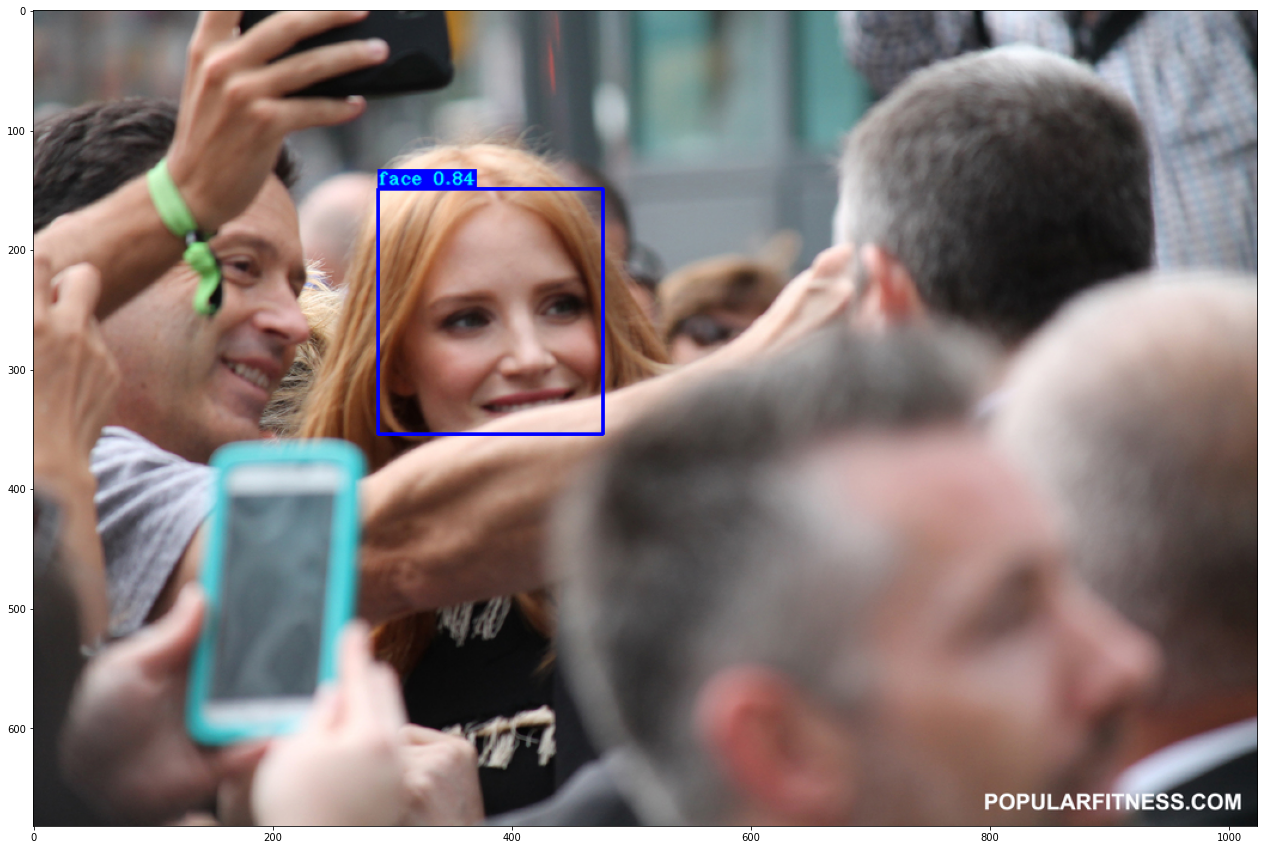

In [12]:
image_path   = "./IMAGES/3.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES,
                     score_threshold=0.5, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [16]:
from yolov3.utils import detect_video
vid_path = 'IMAGES/test1.mp4'
out_path = './out1.mp4'
detect_video(yolo,vid_path,out_path,show=False,CLASSES=TRAIN_CLASSES,iou_threshold=0.1,score_threshold=0.27)

Time: 34.46ms, 29.0 FPS
Time: 34.05ms, 29.4 FPS
Time: 32.96ms, 30.3 FPS
Time: 33.24ms, 30.1 FPS
Time: 35.04ms, 28.5 FPS
Time: 34.30ms, 29.2 FPS
Time: 35.87ms, 27.9 FPS
Time: 35.35ms, 28.3 FPS
Time: 34.84ms, 28.7 FPS
Time: 34.47ms, 29.0 FPS
Time: 34.24ms, 29.2 FPS
Time: 33.97ms, 29.4 FPS
Time: 33.68ms, 29.7 FPS
Time: 33.46ms, 29.9 FPS
Time: 33.95ms, 29.5 FPS
Time: 33.79ms, 29.6 FPS
Time: 33.74ms, 29.6 FPS
Time: 33.67ms, 29.7 FPS
Time: 33.60ms, 29.8 FPS
Time: 33.45ms, 29.9 FPS
Time: 33.22ms, 30.1 FPS
Time: 33.10ms, 30.2 FPS
Time: 33.56ms, 29.8 FPS
Time: 33.54ms, 29.8 FPS
Time: 33.28ms, 30.1 FPS
Time: 33.30ms, 30.0 FPS
Time: 32.62ms, 30.7 FPS
Time: 32.57ms, 30.7 FPS
Time: 32.56ms, 30.7 FPS
Time: 32.62ms, 30.7 FPS
Time: 32.77ms, 30.5 FPS
Time: 32.79ms, 30.5 FPS
Time: 32.85ms, 30.4 FPS
Time: 32.87ms, 30.4 FPS
Time: 32.86ms, 30.4 FPS
Time: 33.11ms, 30.2 FPS
Time: 32.99ms, 30.3 FPS
Time: 32.97ms, 30.3 FPS
Time: 33.38ms, 30.0 FPS
Time: 33.42ms, 29.9 FPS
Time: 33.59ms, 29.8 FPS
Time: 33.56ms, 2

In [15]:
from yolov3.utils import detect_video
vid_path = 'IMAGES/test2.mp4'
out_path = './out2.mp4'
detect_video(yolo,vid_path,out_path,show=False,CLASSES=TRAIN_CLASSES,iou_threshold=0.25,score_threshold=0.3)

Time: 32.74ms, 30.5 FPS
Time: 33.15ms, 30.2 FPS
Time: 31.96ms, 31.3 FPS
Time: 31.34ms, 31.9 FPS
Time: 32.55ms, 30.7 FPS
Time: 32.60ms, 30.7 FPS
Time: 32.04ms, 31.2 FPS
Time: 32.20ms, 31.1 FPS
Time: 31.82ms, 31.4 FPS
Time: 31.61ms, 31.6 FPS
Time: 31.40ms, 31.9 FPS
Time: 31.16ms, 32.1 FPS
Time: 31.06ms, 32.2 FPS
Time: 30.91ms, 32.3 FPS
Time: 31.20ms, 32.0 FPS
Time: 31.11ms, 32.1 FPS
Time: 31.01ms, 32.2 FPS
Time: 30.90ms, 32.4 FPS
Time: 30.81ms, 32.5 FPS
Time: 30.71ms, 32.6 FPS
Time: 30.49ms, 32.8 FPS
Time: 30.33ms, 33.0 FPS
Time: 30.33ms, 33.0 FPS
Time: 30.29ms, 33.0 FPS
Time: 30.19ms, 33.1 FPS
Time: 30.35ms, 32.9 FPS
Time: 30.39ms, 32.9 FPS
Time: 30.17ms, 33.1 FPS
Time: 30.28ms, 33.0 FPS
Time: 30.26ms, 33.0 FPS
Time: 30.45ms, 32.8 FPS
Time: 30.90ms, 32.4 FPS
Time: 30.88ms, 32.4 FPS
Time: 31.07ms, 32.2 FPS
Time: 31.08ms, 32.2 FPS
Time: 31.17ms, 32.1 FPS
Time: 31.30ms, 31.9 FPS
Time: 31.63ms, 31.6 FPS
Time: 31.93ms, 31.3 FPS
Time: 31.95ms, 31.3 FPS
Time: 32.25ms, 31.0 FPS
Time: 32.29ms, 3